# Logistic Regression #

### What is Logistic Regression? ###

* Logistic Regression is a type of supervised machine learning algorithm used primarily for binary classification
* We often denote each one of our classes with either a $0$ or $1$
* For example, in the case we are trying to classify an email as **spam** or **ham**, we could say the class of $1$ corresponds to **spam** and $0$ as ham
* Logistic regression is often used to model the probability of a given input being of the $1$ class




### Mathematical Model ###

* Like it's name, Logistic Regression is modeled through the logistic function
* The standard function is as follows: 

$$\large \sigma(z) = \frac{1}{1 + e^{-z}}$$

* Here, we define $z$ as a linear combination of features we want to use to predict our response: 

$$\large z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n $$

where:
- $t$ represents the linear combination of input features and their associated weights,
- $w_0, w_1, w_2, \ldots, w_n$ are the weights, and
- $x_1, x_2, \ldots, x_n$ are the input features.

* The output of $\sigma(z)$ is a value between $0$ and $1$, corresponding the probability with which our inputted $x$ is of class $1$





### Estimation Techniques: Maximum Likelihood Estimate ###



* $Maximum\ \ Likelihood\ \ Estimate\ \ (MLE)\ $ is a common method used to estimate the parameters, that is our $\theta_1, \theta_2, \ldots $ and so forth
* Won't go into the math behind $MLE$

### Model Evaluation ###

#### Why not MSE? ####

* One might think we should use $Mean\ \ Squared\ \ Error\ \ (MSE)\ $ as our error metric, but it turns out that $MSE$ is not suited for logistic regression
1)  In essence, the $MSE$ surface is *non-convex*, meaning that during **gradient descent** we run the risk of converging on a local minimum, missing the true optimum parameters of $\theta$: 
<center>

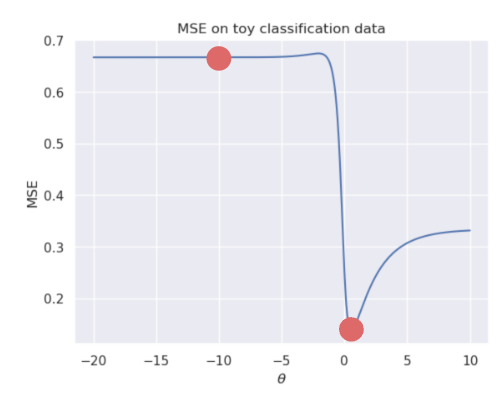
</center>

2) Squared loss is *bounded* for a classification task. If you recall that $y$ has a value of either 0 or 1. This means that even if our model makes the worst possible prediction (predicting $p$ = $0$ for $y$ = 1) the squared loss for an observation will be no greater than 1: 

$$(y - p)^2 = (1 - 0)^2 = 1$$

* So having MSE does not strongly penalize poor predictions: 
<center>

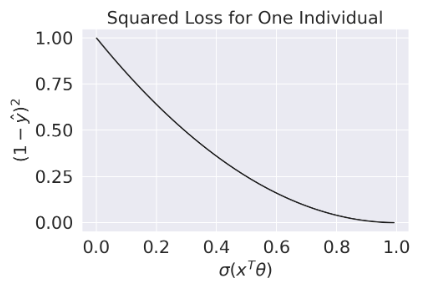
</center>



#### Motivating Cross-Entropy Loss ####

* Let $y$ be the binary label (of $0$ or $1$) and $p$ be the model's predicted probability of the label $y$ being 1. 
* In the case where the true $y$ is 1, we would want to incur *low* loss when the model predicts a large $p$
* When the true $y$ is 0, we should incur *high* loss when the model predicts large $p$

* Suffice to say that our loss function should behave differently depending on the value of our true class, $y$

* In order to account for both of these changes, we define the **cross-entropy loss** (for one data point): 

$$
\text{Cross-Entropy Loss} =
\begin{cases}
- \log(p) & \text{if } y = 1 \\
- \log(1 - p) & \text{if } y = 0
\end{cases}
$$

Let's now observe what the **cross-entropy loss** looks like for when $y$ = $0$ and when $y$ = $1$

<center>

![Screenshot 2024-04-18 at 5.31.53 PM.png](<attachment:Screenshot 2024-04-18 at 5.31.53 PM.png>)
</center>

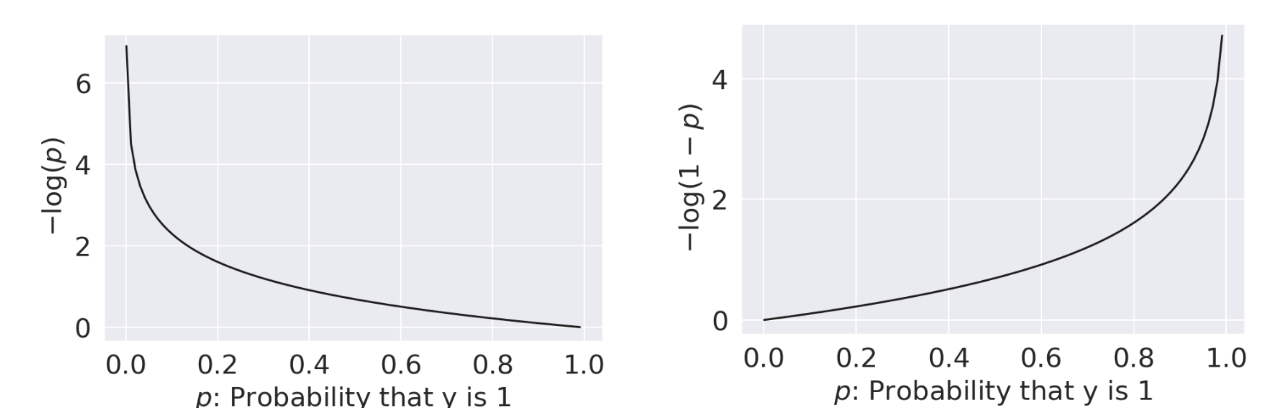

We notice that for the left graph, $p \to 0, $ loss approaches $\infty$ and as $p \to 1, $ loss approaches $0$

We notice that for the right graph, $p \to 0, $ loss approaches $0$ and as $p \to 1, $ loss approaches $\infty$

We can re-define **cross-entropy loss** as: 

$$ 
\text{Cross-Entropy Loss} = -(y \log(p) + (1 - y) \log(1 - p))
$$

In order to find the best estimate of $\hat{\theta}$, we can optimize the following: 

$$
\hat{\theta} = \ -\frac{1}{n} \sum_{i=1}^{n} \left(y_i \log(\sigma(X_i^T \theta)) + (1 - y_i) \log(1 - \sigma(X_i^T \theta))\right)
$$


* Our loss function is now convex! 
